In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def utility_function(risk, u1, u0):
    return (risk * u1) + (u0 * (1 - risk))

In [25]:
# Cardiovascular event
u1 = 0 # Utility of a CVD event
u0 = 1 # Utility of no CVD event
risk_reduction = 0.25

# Side effect
u_side_1 = -1 # Utility of the side effect
u_side_0 = 0 # Utility of no side effect
p_side_treat = 0.1
p_side_no_treat = 0.0

# Risk (assume calibrated)
risk_no_treat = np.linspace(0, 1, 100)
risk_treat = risk_no_treat * (1-risk_reduction)
risk = risk_no_treat

# Conditional utilities
u_cond_no_treat = risk_no_treat*(u1-u0) + u0 + p_side_no_treat*(u_side_1-u_side_0) + u_side_0
u_cond_treat = risk_treat*(u1-u0) + u0 + p_side_treat*(u_side_1-u_side_0) + u_side_0
u_cond = (u0-u1)*(risk_no_treat - risk_treat) + (u_side_0 - u_side_1)*(p_side_no_treat - p_side_treat)
u_cond_alt = u_cond_treat - u_cond_no_treat
assert np.allclose(u_cond, u_cond_alt)

k_side = (u_side_0 - u_side_1)*(p_side_no_treat - p_side_treat)

optimal_threshold = k_side / (risk_reduction*(u1-u0))
print(optimal_threshold)

def ARR(x):
    return risk_reduction*x

0.4


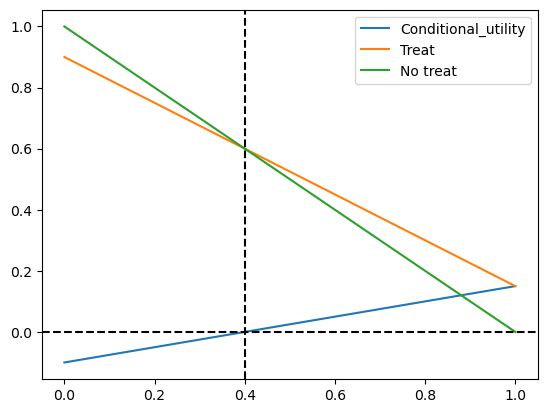

In [29]:
plt.close()
plt.plot(risk, u_cond, label='Conditional_utility')
plt.plot(risk, u_cond_treat, label='Treat')
plt.plot(risk, u_cond_no_treat, label='No treat')
plt.axvline(optimal_threshold, linestyle='--', color = 'k', label="_nolegend_")
plt.axhline(0, linestyle='--', color = 'k', label="_nolegend_")
plt.plot()
plt.legend()
plt.show()